#### Data Selection and Preparation

I'll be using an interesting dataset on housing prices that I've obtained from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv. The first step will be to prepare the data and select the columns we will focus on.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

houses = pd.read_csv("houses.csv")
houses = houses.drop('Id', axis=1)

subset = pd.DataFrame()
subset['price'] = houses['SalePrice']
subset['sf'] = houses['TotalBsmtSF'] + houses['1stFlrSF'] \
    + houses['2ndFlrSF']
subset['bath'] = houses['FullBath'] + houses['HalfBath']/2

row_count,column_count = subset.shape
print("There are {} rows and {} columns. Here is a sample:".format(
    row_count, column_count))
subset.head()

There are 1460 rows and 3 columns. Here is a sample:


,price,sf,bath
0,208500,2566,2.5
1,181500,2524,2.0
2,223500,2706,2.5
3,140000,2473,1.0
4,250000,3343,2.5


#### Write a summary of your data and identify at least two questions to explore visually with your data.


While this dataset is rich with insights, I want to focus in on how square-footage and the number of bathrooms relate to sale price. For this purpose, I've combined the square footage of the different floors into a single number and I've counted half-baths as half of a full bath to derive a single number for bathrooms. Based on these transformations, I want to explore these three questions:


* How does square footage related to sale price?


* How does number of bathrooms relate to sale price?


* Does square footage or number of bathrooms have a stronger effect on sale price?



#### Create a histogram or bar graph from your data.

Minimum Baths:  0.0  Maximum Baths:  3.5


<Axes: title={'center': 'Histogram of Baths'}, ylabel='Frequency'>

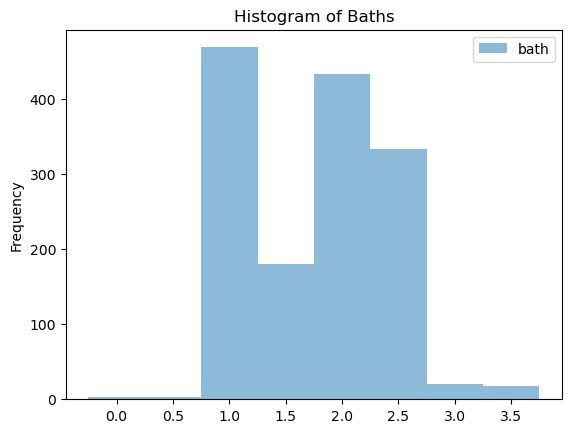

In [33]:
baths = subset[['bath']]
print("Minimum Baths: ",baths.min().iloc[0]," Maximum Baths: ", baths.max().iloc[0])
# Use bins that show bars for each possible value.
bins = np.array([-.25,0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75])
baths.plot.hist(bins=bins, alpha=0.5,title="Histogram of Baths")

Minimum Square Feet:  334  Maximum Square Feet:  11752


<Axes: title={'center': 'Histogram of Square Feet'}, ylabel='Frequency'>

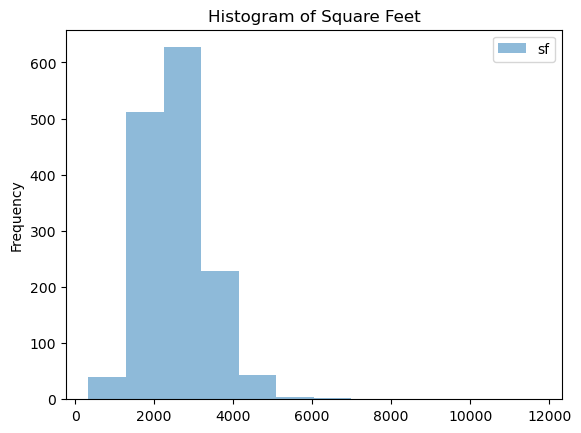

In [32]:
sf = subset[['sf']]
print("Minimum Square Feet: ",sf.min().iloc[0]," Maximum Square Feet: ", sf.max().iloc[0])
sf.plot.hist(bins=12, alpha=0.5,title="Histogram of Square Feet")

<Axes: title={'center': 'Histogram of log Square Feet'}, ylabel='Frequency'>

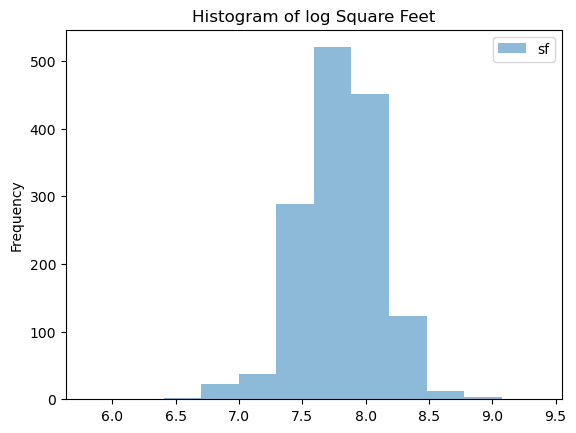

In [31]:
log_sf = pd.DataFrame()
log_sf['sf'] = np.log(subset['sf'])
log_sf.plot.hist(bins=12, alpha=0.5,title="Histogram of log Square Feet")

#### Create a boxplot from your data.

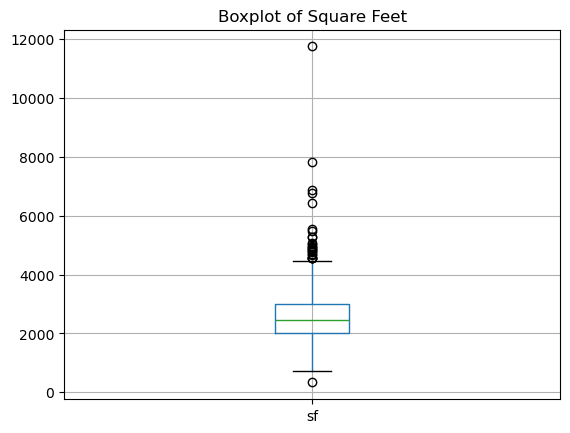

In [36]:
subset.boxplot(column='sf')
plt.title('Boxplot of Square Feet')
plt.show()

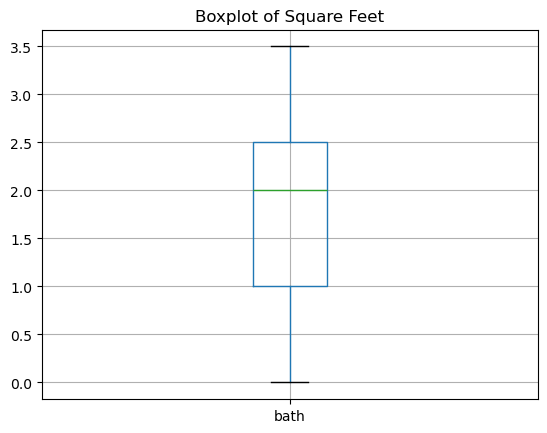

In [38]:
subset.boxplot(column='bath')
plt.title('Boxplot of Square Feet')
plt.show()

In the square feet boxplot, you can see that the high square footage (over 5,000 square feet) are considered outliers.

#### Create a bivariate plot from your data.

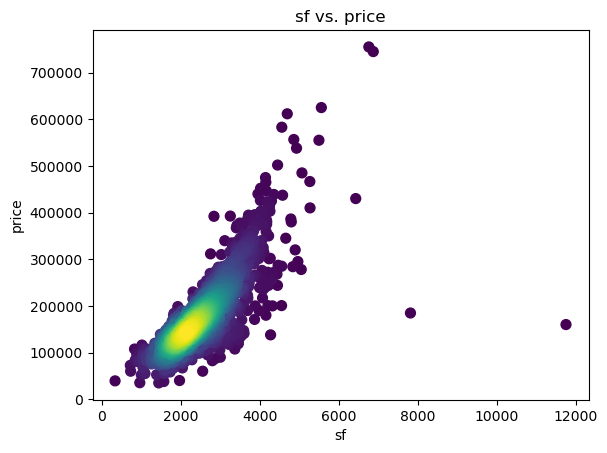

In [45]:
# Here is a function to plot a scatter plot with density,
# adapted from https://stackoverflow.com/a/20107592.
def density_scatter(df,x_name,y_name):
    x,y = df[x_name].to_numpy(),df[y_name].to_numpy()
    
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    fig, ax = plt.subplots()
    cax = ax.scatter(x, y, c=z, s=50, edgecolor=None)
    plt.title(x_name +" vs. "+y_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

density_scatter(subset,'sf','price')

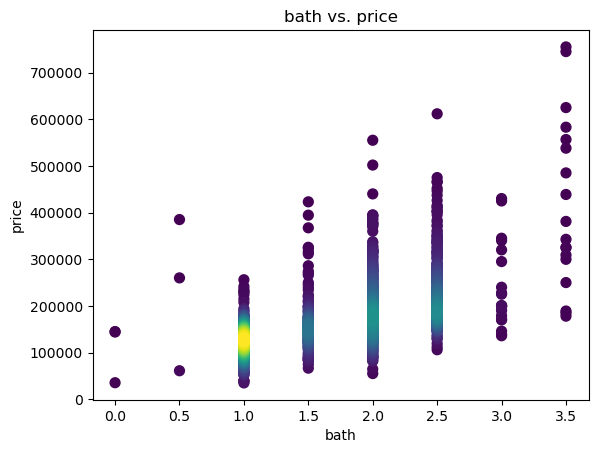

In [46]:
density_scatter(subset,'bath','price')

#### Create any additional visualizations that will help to answer the question(s) you want to answer.

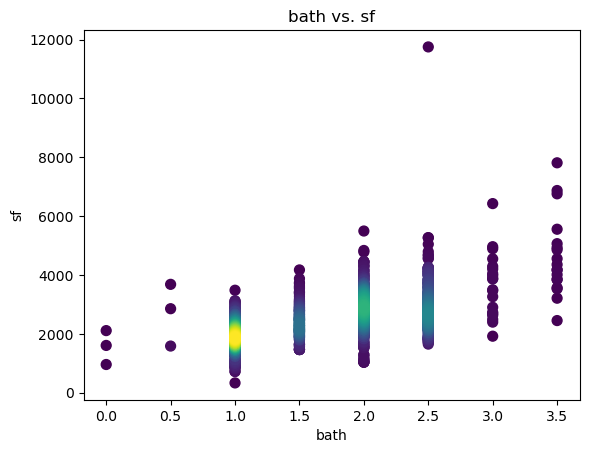

In [47]:
density_scatter(subset,'bath','sf')

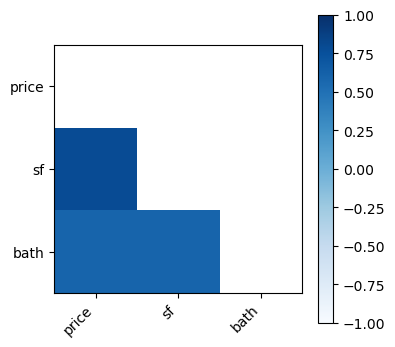

Correlation Matrix:
           price        sf      bath
price  1.000000  0.782260  0.597966
sf     0.782260  1.000000  0.594171
bath   0.597966  0.594171  1.000000


In [60]:
# Adapted from https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from sklearn import datasets
import pandas as pd

matrix = subset.corr()

# Mask the duplicated upper triangle and the diagonal
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_matrix = np.ma.masked_array(matrix, mask)

# plot the masked correlation matrix
plt.imshow(masked_matrix, vmin=-1, vmax=1, cmap="Blues")

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()
print("Correlation Matrix:\n",matrix)

#### Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.

The questions we started with can be answered precisely using the correlation matrix we've printed at the end, but limiting ourselves to just the visualization, it is easy to see from the scatter plots that the square footage has a steeper (stronger) line. This means that square footage has a stronger relationship with sale price than the number of bathrooms. It is worth noting that both square feet and number of bathrooms have a strong relationship with sale price, but square footage has the stronger relationship. From the histograms, you can see that square footage is a normal distribution but bathrooms is not. For bathrooms, we have a much higher tendency towards one or two bathrooms, and very few with 1.5 bathrooms. It is worth noting that bathrooms has so few possible values, and with its non-normal distribution, it is almost functioning more as a categorical variable than a linear one. You can see this tension in the scatter plot between square footage and bathrooms. While there is a positive linear relationship, you can see that each category of bathrooms has it's own qualities and there is an oscilation between categories rather than an even progression.

Something that could be done on a second pass at this data is to remove the outliers and focus in on the remaining data. This would likely make the visuals much clearer with only removing a small portion of the data.